# [2.X코드반영] Lab 07-2-2: Application & Tips: 학습률, 전처리, 오버피팅을 TensorFlow 로 실습

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.4.1


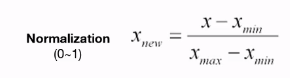

정규화 함수 : 최대 최소값이 1과 0이 되도록 scaling한다.

In [4]:
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data,0)
    return numerator / denominator

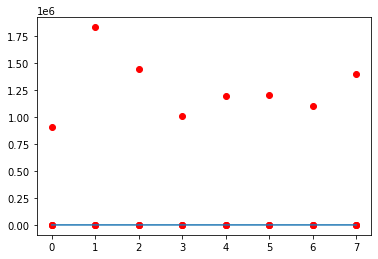

In [5]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, :-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


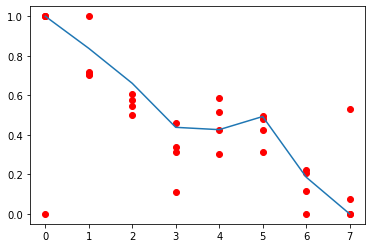

In [7]:
xy = normalization(xy)
print(xy)
x_train = xy[:, :-1]
y_train = xy[:, -1]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))


W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

선형 회귀 모델

In [11]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

Weight의 수가 많아지면 수만큼 더한다 tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3)

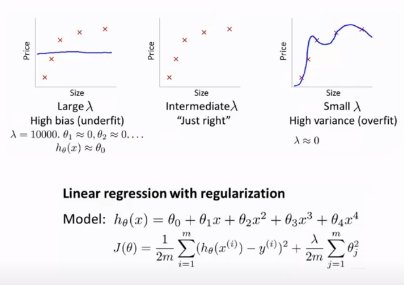

In [16]:
# beta = 람다
def l2_loss(loss, beta=0.01):
    W_reg = tf.nn.l2_loss(W) # 결과 = sum(t**2)/2
    # l2_loss 정규화
    loss = tf.reduce_mean(loss + W_reg *beta)
    return loss

비용 함수(MSE) 정의

In [17]:
def loss_fn(hypothesis, features, labels, flag=False):
    cost = tf.reduce_mean(tf.square(hypothesis-labels))
    if(flag): # flag == True면 l2_loss 사용
        cost = l2_loss(cost)
    return cost

학습 속도 조절(Learning Decay) 설정

In [21]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                  decay_steps=50,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

In [24]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 0.0975
Iter: 10, Loss: 0.0964
Iter: 20, Loss: 0.0956
Iter: 30, Loss: 0.0951
Iter: 40, Loss: 0.0947
Iter: 50, Loss: 0.0944
Iter: 60, Loss: 0.0942
Iter: 70, Loss: 0.0940
Iter: 80, Loss: 0.0939
Iter: 90, Loss: 0.0938
Iter: 100, Loss: 0.0937
